<a href="https://colab.research.google.com/github/pritheroic/Cardiovascular-Disease-Prediction-and-Analysis/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# import dataset
train_main = pd.read_excel("/content/data.xlsx")

Data Exploration

In [3]:
train_main.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
train_main.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print("\nMissing Values in Main Data:")
a=train_main.isnull()
print(a.sum())


Missing Values in Main Data:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Check duplicates
print("\nDuplicate Records in Main Data:")
print(train_main.duplicated().sum())


Duplicate Records in Main Data:
1


In [9]:
# Remove duplicates
train_cleaned = train_main.drop_duplicates()


Preliminary Statistical Summary

In [11]:
statistical_train_summary = train_cleaned.describe()
print(statistical_train_summary)

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

Identify Categorical Variables:

In [28]:
cat_var = train_cleaned.select_dtypes(include=['int64']).columns
print(cat_var)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Analyze distribution of CVD at the age

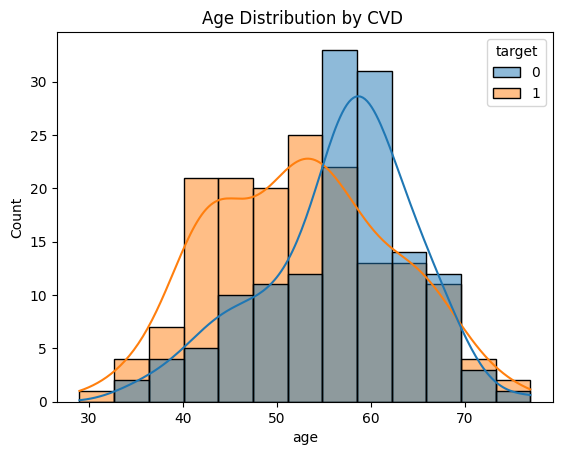

In [29]:
sns.histplot(data=train_cleaned, x='age', hue='target', kde=True)
plt.title('Age Distribution by CVD ')
plt.show()

 distribution by gender

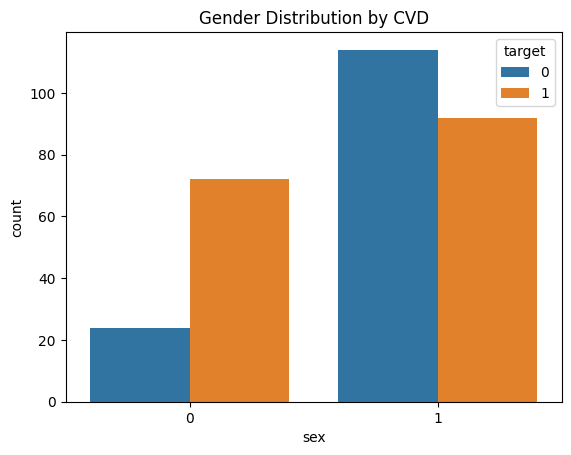

In [30]:
sns.countplot(data=train_cleaned, x='sex', hue='target')
plt.title('Gender Distribution by CVD')
plt.show()

Resting blood pressure

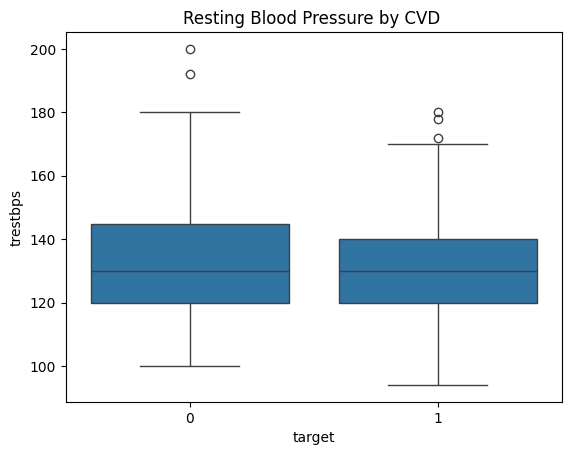

In [31]:
sns.boxplot(data=train_cleaned, x='target', y='trestbps')
plt.title('Resting Blood Pressure by CVD ')
plt.show()

cholesterol levels

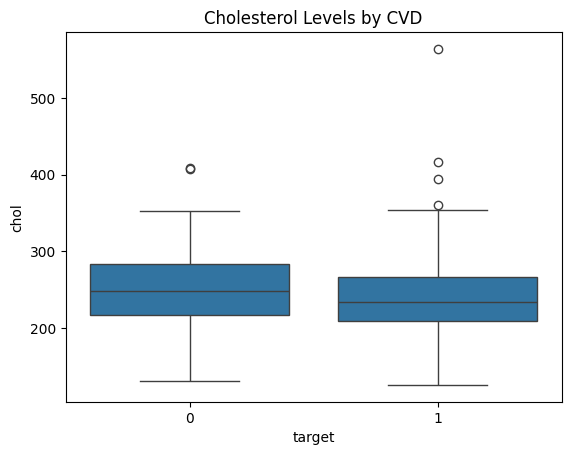

In [32]:
sns.boxplot(data=train_cleaned, x='target', y='chol')
plt.title('Cholesterol Levels by CVD')
plt.show()

Checking peak exercise and thalassemia

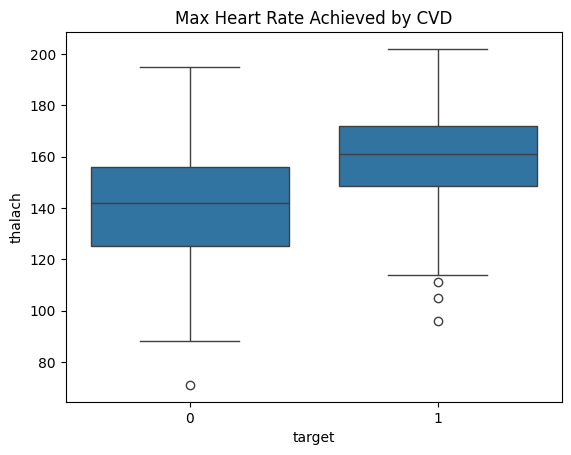

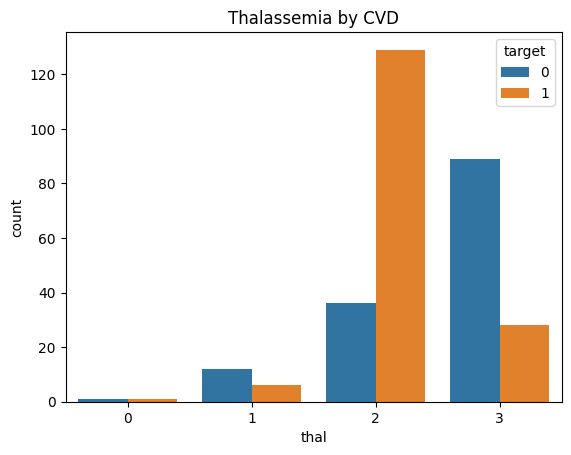

In [33]:
sns.boxplot(data=train_cleaned, x='target', y='thalach')
plt.title('Max Heart Rate Achieved by CVD')
plt.show()

sns.countplot(data=train_cleaned, x='thal', hue='target')
plt.title('Thalassemia by CVD')
plt.show()

Baseline Model

In [22]:
X = train_cleaned.drop('target', axis=1)
y = train_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ex = LogisticRegression(max_iter=1000)
ex.fit(X_train, y_train)

y_pred = ex.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

